<a href="https://colab.research.google.com/github/farahelnakhal/applied_data_science/blob/main/P3_fqe9080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part I: He Who Must Not Be Named (40 points)

The year is 1988. Your name is Barnabas Cuffe. You live in Great Britain and work for the **Ministry of Magic**. You have been assigned the important task of making sure that the wizarding newspaper called the **Daily Prophet** only reports stories that comply with the rules of the Ministry of Magic.

It has come to the Minister's attention that the upcoming issue of the Daily Prophet, makes several references to the **Unspeakables** -- *people who should not be named*.

Your job is to wipe out the names of the Unspeakables and anonymize them, replacing them with the Ministry's preferred name, **John Smith**.

There are far too many articles in this issue for the number of employees in the Ministry of Magic to manually comb over and make the relevant adjustments. The Ministry would like to write a program to do this automatically.


### Example

Suppose we have a segment of text as follows, where the name `Gareth Greengrass` is one of the *Unspeakables*, and hence is on the banned list:

`I believe that Gareth Greengrass is an amazing golfer. Gareth Greengrass’ abilities are far beyond my own. My favorite golfer is Gareth Greengrass, and I have a shirt with GARETH GREENGRASS printed on it.
The article named Gareth-Greengrass was published yesterday. Greengrass is a service that extends Amazon Web Services functionality to Internet of Things.`

After careful processing by your program, this segment should read:

`I believe that John Smith is an amazing golfer. John Smith’ abilities are far beyond my own. My favorite golfer is John Smith, and I have a shirt with GARETH GREENGRASS printed on it.
The article named Gareth-Greengrass was published yesterday. Smith is a service that extends Amazon Web Services functionality to Internet of Things.`


### Prompt

Implement the function `clean` that takes in three arguments: a `list` of banned full names, a `list` of banned last names, and an input `string` to process. It should return as output the input string after the replacement of the banned full names and last names, if any.

Specifically, the function should:

1. Replace all instances of the banned full names with the officially approved name `John Smith`.
2. Replace all banned last names with the officially approved last name `Smith`.

Your implementation will be run against a variety of test cases that will look at normal and edge case behavior of your code. It it thus important that you implement specifically what is necessary, not more or less.

### Some clarifications:

1. *Full name definition*: An instance of a full name always consists of two words, separated only by some whitespace. Each word must be properly capitalized (first letter of each word should be capitalized, the rest should be lower caps) for it to be a full name. Similarly, an instance of a last name is always a single word that is properly capitalized.

2. *Other libraries*: You should not need to use any libraries other than the standard Python libraries.

3. *Regex vs. other methods*: You are required to implement a Regex based solution to this problem.

4. *Whitespace*: Your solution should preserve the original whitespace in the input source, if any. Do not add, remove, or replace any whitespace.

5. *Can a last name be a first name?*: Yes, but you should prioritize full name replacement over last name replacement if possible.

6. *Is that (e.g. Greengrass) a last name or something else?* - You have no way of knowing at this point, so if it looks like a last name, it is a last name. Replace it.

7. *Helper Functions*: You can write helper functions if you'd like.

8. We highly recommend you read this [documentation](https://docs.python.org/3.6/library/re.html) before attempting this part especially functions such as `re.sub()` and `re.compile()`.


In [5]:
import re

def clean(banned_fn_lst, banned_ln_lst, input_text):

  """You can assume that list of last names is the set of unique last names derived
  from the list of full names i.e.
  banned_ln_lst = list(set([s.split()[-1] for s in full_names]))

  :param banned_fn_lst: list of censored full names to be replaced
  :param banned_ln_lst: list of censored last names to be replaced
  :param input_text: input text to process
  :returns clean_str: output text with censored full names and last names removed
  """

  clean_str = input_text #output string that will have the names replaced with John Smith

  # Ministry approved full name and last name for your use to replace names with
  replacement_full_name = "John Smith"
  replacement_last_name = "Smith"

  # Please write your implementation below this line
  ######### SOLUTION #########
  #replace full names first (two properly capitalized words, exact match)
  for full_name in banned_fn_lst:
    # full name is two words with the first letter capitalized and rest
    # lowercase and find apostrophe and s
    first_name, last_name = full_name.split()
    pattern = r"\b" + re.escape(first_name) + r"\s+" + re.escape(last_name) + r"('s)?\b"
    clean_str = re.sub(pattern, replacement_full_name + r"\1", clean_str)

  # replace last names (single properly capitalized words, exact match),
  # ensuring it's a standalone word
  for last_name in banned_ln_lst:
    # last name is single word with first letter capitalized and rest lowercase
    # and find optional apostrophe and s
    pattern = r"(?<![-])\b" + re.escape(last_name) + r"('s)?\b(?![-])"
    clean_str = re.sub(pattern, replacement_last_name + r"\1", clean_str)
  ######### SOLUTION END #########

  return clean_str

In [6]:
# Example of how we will call your function with different input/output pairs
# Example pair 1
# Given input
input_text = "I believe that Gareth Greengrass is an amazing golfer. Gareth Greengrass' "\
      "abilities are far beyond my own. My favorite golfer is Gareth Greengrass, "\
      "and I have a shirt with GARETH GREENGRASS printed on it. The article named "\
      "Gareth-Greengrass was published yesterday. Greengrass is a service that extends "\
      "Amazon Web Services functionality to Internet of Things."

# Expected output
output_text = "I believe that John Smith is an amazing golfer. John Smith' "\
      "abilities are far beyond my own. My favorite golfer is John Smith, "\
      "and I have a shirt with GARETH GREENGRASS printed on it. The article named "\
      "Gareth-Greengrass was published yesterday. Smith is a service that extends "\
      "Amazon Web Services functionality to Internet of Things."

# Example pair 2
# Given input
input_text2 = "Samuel Jones was a tall man, but not in an unreachable way. Jones used to play poker in an inn near his house. "\
        "Samuel was so famous, that the inn had a wall with SAMUEL-JONES painted on it. Jones' favourite drink was bourbon on the rocks."

# Expected output
output_text2 = "John Smith was a tall man, but not in an unreachable way. Smith used to play poker in an inn near his house. "\
            "Samuel was so famous, that the inn had a wall with SAMUEL-JONES painted on it. Smith' favourite drink was bourbon on the rocks."

# If your implementation is correct, this line should not give any error
assert(clean(["Gareth Greengrass"],["Greengrass"],input_text) == output_text)
assert(clean(["Samuel Jones"],["Jones"],input_text2) == output_text2)

## Part II: Data Exploration: Analyzing COVID-19 Misinformation On Twitter (60 points)

With the emergence of COVID-19 pandemic, the political and medical misinformation elevated to create what was being commonly referred to as the global **infodemic**. A huge chunk of the false information on COVID-19 was spread via Twitter. In this part you will use your knowledge of regular expressions to explore the Twitter data on COVID-19 discourse.

Before we describe the prompt, let us look at the data.


In [7]:
# Loading the dataset

# In Google colab, you need to mount your drive to be access your files. If you are running jupyter notebook locally no need to do this step.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Let us now read the tweets as list of lines
path = "/content/drive/MyDrive/Applied Data Science/datasets" # edit the path to your folder containing the data file
tweets = ""
with open(path+"/covid19_misinformation_data.txt","r") as file:
    # we'll read that into a variable called tweets
    tweets=file.readlines()

# If you want you can look at the tweets by uncommenting the following line
tweets

['1055WERC || Tue Mar 10 14:38:00 +0000 2020 || PAGS PARODY! Plus, Joe talks coronavirus and has special guest Peter J Hasson on his new book. - @JoeTalkShow https://t.co/IJE4gZwI0V || 0.2819662242 || irrelevant\n',
 'fasteddiekc || Wed Mar 18 07:16:32 +0000 2020 || #coronavirus shows that racists have absolutely 2 much time on their hands Firstly, those racists who hate POC &amp; R… https://t.co/M72D8jbgt2 || 0.8441984525 || irrelevant\n',
 'Atho_1982 || Sat Mar 21 11:24:40 +0000 2020 || @Laura1206 @ShitChester I would expect front line staff to be more of a risk of having coronavirus than the average… https://t.co/HO3I8yx6ly || 0.2633729135 || irrelevant\n',
 'Georgia_VOL || Sun Mar 22 23:40:18 +0000 2020 || If your mountain of toilet paper falls on you and kills you, did you die from the coronavirus? || 0.8548931203 || irrelevant\n',
 'interaksyon || Thu Mar 26 03:58:16 +0000 2020 || The coronavirus is not only affecting the way we live, it’s also dramatically affecting the way we d

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The data we are working with has 4573 tweets with each line having a username, datetime, tweet, bot probability, and category class, all separated by a whitespace character, two pipes `||`, and another whitespace character. Let's look at an example line from the file above to understand this better:

`twitmo20 || Tue Jul 07 19:19:40 +0000 2020 || Imagine you are a Democratic and were told that COVID is a Bioweapon used on the people in another attempt to destr… https://t.co/JJpXaIqRt8 || 0.7716583196 || politics`

In the above line `twitmo20` is the **username** of the user who tweeted this tweet, `Tue Jul 07 19:19:40 +0000 2020` is the **date and time** of this tweet, `Imagine you are a Democratic and were told that COVID is a Bioweapon used on the people in another attempt to destr… https://t.co/JJpXaIqRt8` is the **tweet** text itself, **0.7716583196** is the probability that this tweet was by a **bot**  *(>0.7716.. signifies that there is more than 77% probability that this is a bot account)*, and finally `politics` means this tweet has been **categorized** or **annotated** as a political tweet.

Now that we have read the data for you above, we would like to explore it, and that is what we will do in the next 3 parts.

### Prompt

### A. Exploring categories (20 points)

In the above example, we saw that the tweet was categorized as a `politics` tweet. That is, however, not the only category in our dataset. Use your knowledge of regular expressions to extract all the different categories in the dataset, along with the distribution of the categories.

More precisely, write a function called `categories_to_counts(tweets)` that takes in the list of tweet text above, and returns a dictionary with `category` as the key and `count` as value.

For example, if your dataset had only two categories (`politics` and `conspiracy`) with two tweets categorized as `politics` and three tweets categorized as `conspiracy`, then your function should return `{'politics': 2, 'conspiracy': 3}` as output.

Tip: You may find the `collections` library useful to count, so we have imported that for you.

In [10]:
from collections import Counter

def categories_to_counts(tweets):
  category_to_count_dict = {}

  # Please write your implementation below this line
  ######### SOLUTION #########
  categories = []
  for tweet in tweets:
    match = re.search(r"\|\|\s*([^|]+)\s*$", tweet)
    if match:
      categories.append(match.group(1).strip())
  category_to_count_dict = dict(Counter(categories))
  ######### SOLUTION END #########

  return category_to_count_dict

# This is how we will call your function
c2c_dict = categories_to_counts(tweets)

c2c_dict

{'irrelevant': 131,
 'politics': 512,
 'true public health response': 163,
 'news': 95,
 'calling out or correction': 1331,
 'sarcasm or satire': 476,
 'fake cure': 141,
 'conspiracy': 924,
 'true prevention': 175,
 'ambiguous or hard to classify': 143,
 'false fact or prevention': 321,
 'panic buying': 70,
 'commercial activity or promotion': 37,
 'fake treatment': 34,
 'emergency': 17,
 'false public health response': 3}

Just for fun, run this code to actually look at the

*   List item
*   List item

distribution of your data categories as a pie chart to understand your data better.

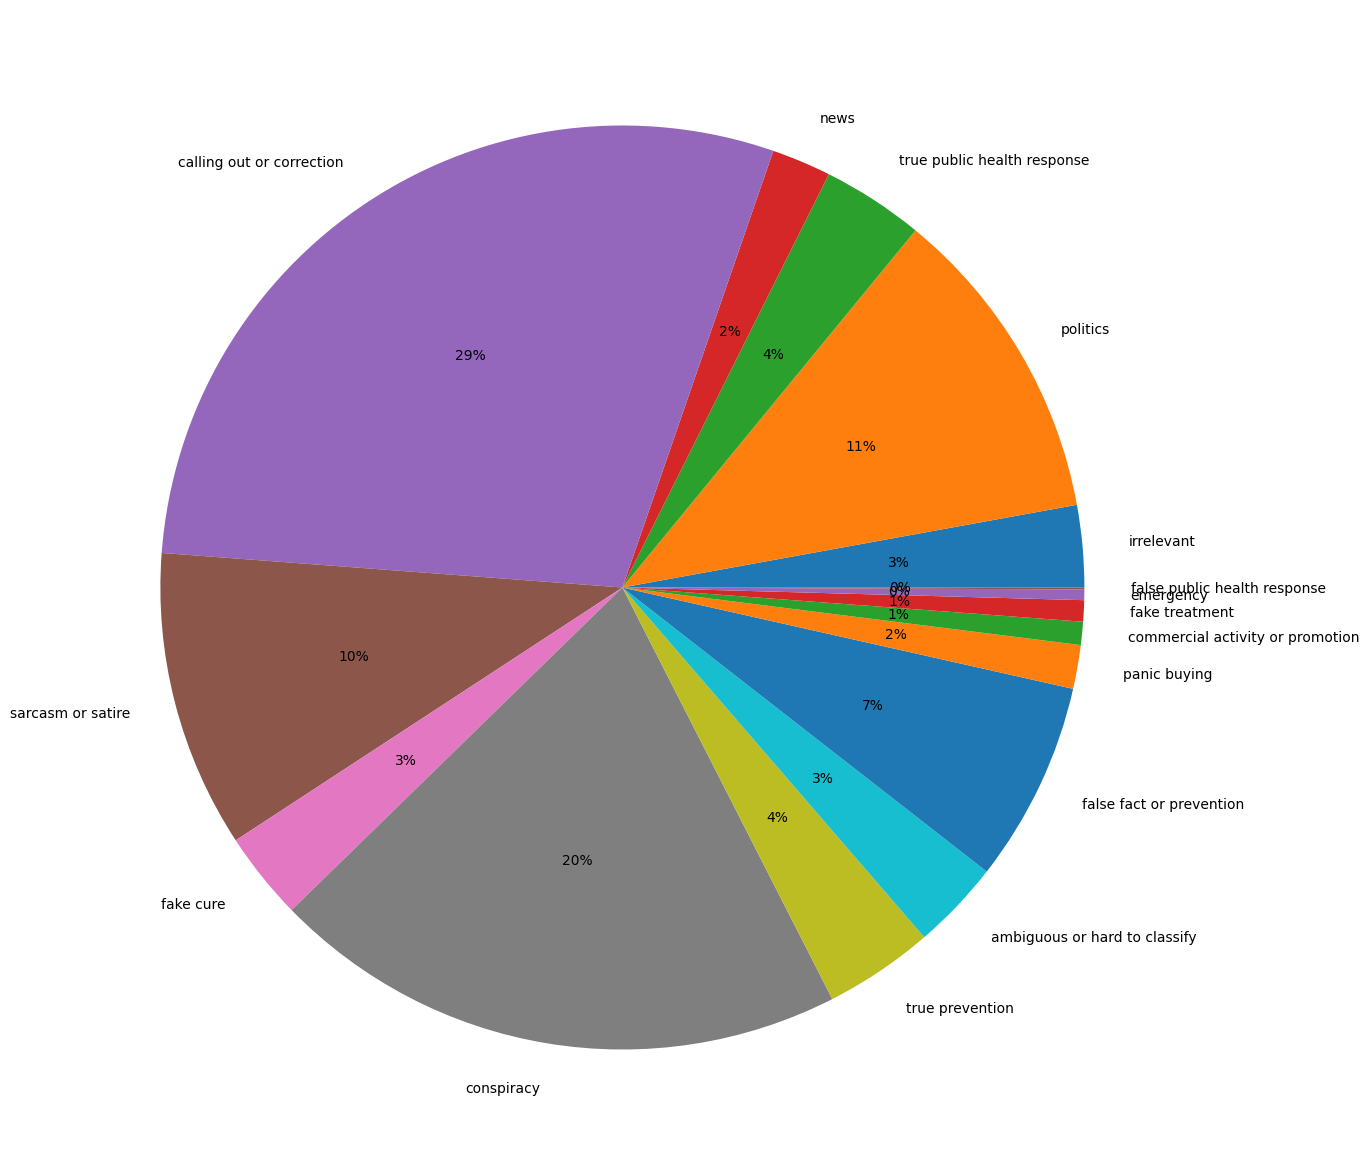

In [11]:
# importing appropriate libraries
from matplotlib import pyplot as plt

def create_pie_chart(counts_dictionary):
  # Creating a plot
  fig = plt.figure(figsize =(15, 15))
  data = counts_dictionary.values()
  categories = counts_dictionary.keys()
  plt.pie(data, labels = categories, autopct='%1.0f%%')
  # Displaying the plot
  plt.show()

create_pie_chart(c2c_dict)

### B. Exploring hashtag distribution in informed and misinformed users (20 points)

Within the COVID-19 discourse, there are two kinds of users, **informed** users, and **misinformed** users. Informed users are the ones that have tweets in the categores of `calling out or correction`, `true prevention`, `true public health response`, and `sarcasm or satire`. These are users who post true and useful information, and call out or make fun of misinformation. Unfortunately, there is also a huge chunk of misinformed users. These are tweeters who tweet about `conspiracy`, `false fact or prevention`, `fake cure`, `fake treatment`, and `false public health response`. Basically, these are users who are responsible for spreading misinformation.

We would like to know that on average how many hashtags do informed users use, and how many hashtags do misinformed users use.

More concretely, complete the function `average_hashtags_per_class(tweets)` that takes in the `tweets` and prints the average number of hashtags used by informed as well as misinformed users.



In [12]:
import re

def average_hashtags_per_class(tweets):

  informed_categories = ['calling out or correction', 'true prevention', 'true public health response', 'sarcasm or satire']
  misinformed_categories = ['conspiracy', 'false fact or prevention', 'fake cure', 'fake treatment', 'false public health response']

  average_hashtags_informed = 0
  average_hashtags_misinformed = 0

  # Please write your implementation below this line
  ######### SOLUTION #########
  informed_count = informed_total = 0
  misinformed_count = misinformed_total = 0

  for tweet in tweets:
    match = re.search(r"^\s*[^|]+\s*\|\|[^|]+\|\|\s*(.*?)\s*\|\|\s*([\d.]+)\s*\|\|\s*(.+)$", tweet)
    if match:
      text, botprob, category = match.group(1), match.group(2), match.group(3).strip()
      hashtag_count = len(re.findall(r"#\w+", text))

      if category in informed_categories:
        informed_total += hashtag_count
        informed_count += 1
      elif category in misinformed_categories:
        misinformed_total += hashtag_count
        misinformed_count += 1

  if informed_count > 0:
    average_hashtags_informed = informed_total / informed_count
  if misinformed_count > 0:
    average_hashtags_misinformed = misinformed_total / misinformed_count
  ######### SOLUTION END #########

  # Printing average values
  print("Informed users use %f hashtags on average in a tweet"%average_hashtags_informed)
  print("Misinformed users use %f hashtags on average in a tweet"%average_hashtags_misinformed)

average_hashtags_per_class(tweets)

Informed users use 0.366900 hashtags on average in a tweet
Misinformed users use 0.922699 hashtags on average in a tweet


### C. Retrieving bot accounts (20 points)

For each username in our dataset, we have an assigned bot probability. For this task, we would like to print the usernames of all the users that are bots, and also their bot probabilities. Particularly, we would like to print the usernames and bot probabilities of each user if they have a bot probability of greater than `0.70`.

Write a regex pattern that takes in a tweet text as above, and prints in the following format:

`{'username': '1055WERC', 'botprob': '0.7819662242'}`

`{'username': 'Atho_1982', 'botprob': '0.8633729135'}`

`{'username': 'interaksyon', 'botprob': '0.97794317549999995'}`

...

We have already provided you with the code. All you need to do is write the regex pattern and assign it to the variable `pattern`.

Notes:

1. You are not allowed to change the code below.
2. Please read and play with the code below to understand what it is doing.
3. You are not allowed to use `.split()` function.

In [13]:
def get_bot_accounts(tweet, pattern):
  """
  This function takes in a tweet and a pattern and prints the output
  as described above
  """
  for item in re.finditer(pattern,tweet):
    print(item.groupdict())

######### SOLUTION #########
pattern = r"^(?P<username>[^|]+).*?\|\|\s*(?P<botprob>[0-9.]+)\s*\|\|"
######### SOLUTION END #########

for tweet in tweets:
  get_bot_accounts(tweet.rstrip(), pattern)

{'username': '1055WERC ', 'botprob': '0.2819662242'}
{'username': 'fasteddiekc ', 'botprob': '0.8441984525'}
{'username': 'Atho_1982 ', 'botprob': '0.2633729135'}
{'username': 'Georgia_VOL ', 'botprob': '0.8548931203'}
{'username': 'interaksyon ', 'botprob': '0.37794317549999995'}
{'username': 'saintevenlive ', 'botprob': '0.8002252668000001'}
{'username': 'ioncorruption ', 'botprob': '0.7434430488'}
{'username': 'barandbench ', 'botprob': '0.01055515751'}
{'username': 'PenguinSix ', 'botprob': '0.022652878650000003'}
{'username': 'TheWireScience ', 'botprob': '0.06813302286'}
{'username': 'GNYHA ', 'botprob': '0.02524041895'}
{'username': 'albertfong98 ', 'botprob': '0.32400806309999997'}
{'username': 'OriginalLeeMays ', 'botprob': '0.5729406847999999'}
{'username': 'Whatali38649130 ', 'botprob': '0.8823683413'}
{'username': 'AFPFactCheck ', 'botprob': '0.117469683'}
{'username': 'CodaStory ', 'botprob': '0.06921278153'}
{'username': 'ItsBunk ', 'botprob': '0.07926773617'}
{'username'